In [1]:
#librerias
import numpy as np
import pandas as pd
import seaborn as sns

# Cargando datos

In [2]:
# carga de datos
data1 = pd.read_csv("./data/train_1.csv",sep=";",index_col=None,header=0)
data2 = pd.read_csv("./data/train_2.csv",sep=";",index_col=None,header=0)
salida = pd.read_csv("./data/train_3.csv",sep=";",index_col=None,header=0)

#uniendo la data
data = data1.merge(data2,how='inner',on=['NUMPERIODO', 'NUMCODCONTRATOBSCS', 'VCHTELEFONO'])
data = data.merge(salida,how='inner',on=['NUMPERIODO', 'NUMCODCONTRATOBSCS', 'VCHTELEFONO'])

In [3]:
df = data.copy()

In [4]:
columns_exec = []
columns_exec.append('NUMINGRESOTEORICO')
columns_exec.append('VCHFAMILIA_PLAN')
columns_exec.append('NUMPERIODO')
columns_exec.append('VCHTELEFONO')
columns_exec.append('ANT_CLIENTE')
columns_exec.append('FLG_RECARGA')
columns_exec.append('VCHPACKCHIP')
columns_exec.append('VCHRANGO_RENTA')


In [5]:
pd.DataFrame(df.dtypes[df.dtypes=='object'])

0
VCHPACKCHIP      object
VCHRANGO_RENTA   object
VCHFAMILIA_PLAN  object

In [6]:
df['VCHPACKCHIP'].value_counts()

PACK    510
SIM     239
Name: VCHPACKCHIP, dtype: int64

In [7]:
# VCHPACKCHIP
dicc_VCHPACKCHIP = {'PACK':0,
                   'SIM':0}
df['VCHPACKCHIP'] = df['VCHPACKCHIP'].map(dicc_VCHPACKCHIP)

In [8]:
# VCHRANGO_RENTA
df_VCHRANGO_RENTA_dummies = pd.get_dummies(df['VCHRANGO_RENTA'],prefix='VCHRANGO_RENTA')

In [9]:
df = pd.concat([df,df_VCHRANGO_RENTA_dummies],axis=1)

In [10]:
df.head()

NUMPERIODO  NUMCODCONTRATOBSCS  VCHTELEFONO  ANT_CLIENTE  NUMRENTABASICA  \
0      201804            38172100  51982603192     7.645161       41.525398   
1      201804             9028333  51983661925    45.903226      122.879997   
2      201805            34979663  51942976545    11.612903       66.949203   
3      201805            13670934  51958993810    32.838710       41.525398   
4      201804            16547229  51934098463    28.387097       62.711899   

   VCHPACKCHIP  NUMINGRESOTEORICO  NUMMINUTOSENTRANTE_2M  \
0            0            41.5254                    151   
1            0            92.3700                     54   
2            0                NaN                    792   
3            0                NaN                    170   
4            0            62.7119                    219   

   NUMMINUTOSALIENTE_2M  NUMMINSALIENTEOFFNET_2M          ...           \
0                   596                 590.9832          ...            
1                   410                 327.9664          ...            
2                   587                 512.2667          ...            
3                   144                 100.5000          ...            
4                   784                 745.2162          ...            

   PCT_MB_ADICIONAL  PCT_USO_TRAFICOTOTAL_2M  PCT_USO_TRAFICOTOTAL_1M  \
0                 0                      0.0                      0.0   
1                 0                      0.0                      0.0   
2                 0                      0.0                      0.0   
3                 0                      0.0                      0.0   
4                 0                      0.0                      0.0   

   PCT_USO_TRAFICOTOTAL_M0  PCT_USO_TRAFICOTOTAL_U3M  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   PCT_USO_TRAFICOTOTAL_U2M  FLG_RECARGA  VCHRANGO_RENTA_Alta  \
0                       0.0            0                    0   
1                       0.0            0                    1   
2                       0.0            0                    0   
3                       0.0            0                    0   
4                       0.0            1                    0   

   VCHRANGO_RENTA_Baja  VCHRANGO_RENTA_Media  
0                    1                     0  
1                    0                     0  
2                    0                     1  
3                    1                     0  
4                    0                     1  

[5 rows x 360 columns]

In [11]:
x_data = df.drop(columns=columns_exec)

In [12]:
x_data.head()

NUMCODCONTRATOBSCS  NUMRENTABASICA  NUMMINUTOSENTRANTE_2M  \
0            38172100       41.525398                    151   
1             9028333      122.879997                     54   
2            34979663       66.949203                    792   
3            13670934       41.525398                    170   
4            16547229       62.711899                    219   

   NUMMINUTOSALIENTE_2M  NUMMINSALIENTEOFFNET_2M  NUMMINENTRANTEOFFNET_2M  \
0                   596                 590.9832                 155.5999   
1                   410                 327.9664                  14.1669   
2                   587                 512.2667                 657.4498   
3                   144                 100.5000                 122.3668   
4                   784                 745.2162                 193.3838   

   NUMMINSALIENTEONNET_2M  NUMMINENTRANTEONNET_2M  NUMTRAFICOFACEBOOK_2M  \
0                  5.0168                  0.0000              52.437877   
1                 82.0336                 39.8331              33.883530   
2                 74.7333                134.5502             106.086946   
3                 43.5000                 47.6332              47.410069   
4                 38.7838                 25.6162             237.011286   

   NUMTRAFICOWHATSAPP_2M          ...           NUMKB_ADICIONAL  \
0             291.387089          ...                       0.0   
1             106.631694          ...                       0.0   
2             366.092574          ...                       0.0   
3             739.959649          ...                       0.0   
4            1114.929423          ...                       0.0   

   PCT_MB_ADICIONAL  PCT_USO_TRAFICOTOTAL_2M  PCT_USO_TRAFICOTOTAL_1M  \
0                 0                      0.0                      0.0   
1                 0                      0.0                      0.0   
2                 0                      0.0                      0.0   
3                 0                      0.0                      0.0   
4                 0                      0.0                      0.0   

   PCT_USO_TRAFICOTOTAL_M0  PCT_USO_TRAFICOTOTAL_U3M  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   PCT_USO_TRAFICOTOTAL_U2M  VCHRANGO_RENTA_Alta  VCHRANGO_RENTA_Baja  \
0                       0.0                    0                    1   
1                       0.0                    1                    0   
2                       0.0                    0                    0   
3                       0.0                    0                    1   
4                       0.0                    0                    0   

   VCHRANGO_RENTA_Media  
0                     0  
1                     0  
2                     1  
3                     0  
4                     1  

[5 rows x 352 columns]

In [13]:
y_data = df['FLG_RECARGA']

In [14]:
from sklearn.cross_validation import train_test_split

C:\Users\mmejia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [166]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,train_size=0.65,random_state=50)

In [167]:
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

# Scaling

In [168]:
X_train.head()

NUMCODCONTRATOBSCS  NUMRENTABASICA  NUMMINUTOSENTRANTE_2M  \
0            11538633       66.949203                    512   
1            10051904      109.321999                    347   
2            25077292       62.711899                    185   
3            30858312       66.949203                    269   
4            36974733       41.525398                     13   

   NUMMINUTOSALIENTE_2M  NUMMINSALIENTEOFFNET_2M  NUMMINENTRANTEOFFNET_2M  \
0                   705                 420.0667                 267.8005   
1                   587                 395.9825                 229.9501   
2                   173                  96.9832                  25.4501   
3                   526                 272.7163                 187.0336   
4                    16                  12.8500                  11.6334   

   NUMMINSALIENTEONNET_2M  NUMMINENTRANTEONNET_2M  NUMTRAFICOFACEBOOK_2M  \
0                284.9333                244.1995              42.972771   
1                191.0175                117.0499              52.954968   
2                 76.0168                159.5499              11.346016   
3                253.2837                 81.9664               7.147714   
4                  3.1500                  1.3666              16.388098   

   NUMTRAFICOWHATSAPP_2M          ...           NUMKB_ADICIONAL  \
0              76.336844          ...                       0.0   
1            1046.706100          ...                       0.0   
2              17.900717          ...                       0.0   
3              48.908687          ...                       0.0   
4            3402.328921          ...                       0.0   

   PCT_MB_ADICIONAL  PCT_USO_TRAFICOTOTAL_2M  PCT_USO_TRAFICOTOTAL_1M  \
0                 0                      0.0                      0.0   
1                 0                      0.0                      0.0   
2                 0                      0.0                      0.0   
3                 0                      0.0                      0.0   
4                 0                      0.0                      0.0   

   PCT_USO_TRAFICOTOTAL_M0  PCT_USO_TRAFICOTOTAL_U3M  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   PCT_USO_TRAFICOTOTAL_U2M  VCHRANGO_RENTA_Alta  VCHRANGO_RENTA_Baja  \
0                       0.0                    0                    0   
1                       0.0                    1                    0   
2                       0.0                    0                    0   
3                       0.0                    0                    0   
4                       0.0                    0                    1   

   VCHRANGO_RENTA_Media  
0                     1  
1                     0  
2                     1  
3                     1  
4                     0  

[5 rows x 352 columns]

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [170]:
X_train_scaler = scaler.transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_train_scaler.head(3)

NUMCODCONTRATOBSCS  NUMRENTABASICA  NUMMINUTOSENTRANTE_2M  \
0           -1.408671        0.098087               0.435142   
1           -1.540446        1.849302              -0.074342   
2           -0.208683       -0.077036              -0.574562   

   NUMMINUTOSALIENTE_2M  NUMMINSALIENTEOFFNET_2M  NUMMINENTRANTEOFFNET_2M  \
0              0.518477                 0.333913                 0.237923   
1              0.230251                 0.251391                 0.049064   
2             -0.780979                -0.773097                -0.971313   

   NUMMINSALIENTEONNET_2M  NUMMINENTRANTEONNET_2M  NUMTRAFICOFACEBOOK_2M  \
0                0.491938                0.433751              -0.270907   
1                0.089417               -0.158484              -0.253968   
2               -0.403473                0.039472              -0.324576   

   NUMTRAFICOWHATSAPP_2M          ...           NUMKB_ADICIONAL  \
0              -0.590015          ...                 -0.492917   
1               0.311830          ...                 -0.492917   
2              -0.644324          ...                 -0.492917   

   PCT_MB_ADICIONAL  PCT_USO_TRAFICOTOTAL_2M  PCT_USO_TRAFICOTOTAL_1M  \
0               0.0                -0.333305                 -0.34785   
1               0.0                -0.333305                 -0.34785   
2               0.0                -0.333305                 -0.34785   

   PCT_USO_TRAFICOTOTAL_M0  PCT_USO_TRAFICOTOTAL_U3M  \
0                -0.372911                 -0.363294   
1                -0.372911                 -0.363294   
2                -0.372911                 -0.363294   

   PCT_USO_TRAFICOTOTAL_U2M  VCHRANGO_RENTA_Alta  VCHRANGO_RENTA_Baja  \
0                 -0.361065            -0.242536            -0.703836   
1                 -0.361065             4.123106            -0.703836   
2                 -0.361065            -0.242536            -0.703836   

   VCHRANGO_RENTA_Media  
0              0.794275  
1             -1.259010  
2              0.794275  

[3 rows x 352 columns]

In [171]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)
X_test_scaler.head(3)

NUMCODCONTRATOBSCS  NUMRENTABASICA  NUMMINUTOSENTRANTE_2M  \
0           -1.617386       -0.952648              -0.710424   
1            0.893504        1.148817              -0.478841   
2            0.661753        0.448327               0.095486   

   NUMMINUTOSALIENTE_2M  NUMMINSALIENTEOFFNET_2M  NUMMINENTRANTEOFFNET_2M  \
0             -0.062859                -0.198662                -0.465947   
1             -0.680833                -0.523370                -0.153929   
2             -0.026220                -0.638096                 0.398251   

   NUMMINSALIENTEONNET_2M  NUMMINENTRANTEONNET_2M  NUMTRAFICOFACEBOOK_2M  \
0                0.138059               -0.637228              -0.340991   
1               -0.540125               -0.579162              -0.272753   
2                0.752026               -0.228271              -0.323279   

   NUMTRAFICOWHATSAPP_2M          ...           NUMKB_ADICIONAL  \
0              -0.657123          ...                 -0.492917   
1              -0.544398          ...                 -0.492917   
2              -0.573337          ...                 -0.492917   

   PCT_MB_ADICIONAL  PCT_USO_TRAFICOTOTAL_2M  PCT_USO_TRAFICOTOTAL_1M  \
0               0.0                -0.333305                 -0.34785   
1               0.0                -0.333305                 -0.34785   
2               0.0                -0.333305                 -0.34785   

   PCT_USO_TRAFICOTOTAL_M0  PCT_USO_TRAFICOTOTAL_U3M  \
0                -0.372911                 -0.363294   
1                -0.372911                 -0.363294   
2                -0.372911                 -0.363294   

   PCT_USO_TRAFICOTOTAL_U2M  VCHRANGO_RENTA_Alta  VCHRANGO_RENTA_Baja  \
0                 -0.361065            -0.242536             1.420786   
1                 -0.361065            -0.242536            -0.703836   
2                 -0.361065            -0.242536            -0.703836   

   VCHRANGO_RENTA_Media  
0             -1.259010  
1              0.794275  
2              0.794275  

[3 rows x 352 columns]

In [172]:
X_train = X_train_scaler.copy()
X_test = X_test_scaler.copy()

In [173]:
print(X_train.shape)
print(X_test.shape)

(486, 352)
(263, 352)


## Modelamiento

In [174]:
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)

In [175]:
################################## CURVA ROC ###############################
def graficar_roc(y_test,y_pred_proba):
    import matplotlib.pyplot as plt
    from sklearn import metrics as mt
    from sklearn.cross_validation import train_test_split

    fpr, tpr, thresholds  = mt.roc_curve(y_test.astype('int'),y_pred_proba[:,1], pos_label = 1)

    roc_auc = mt.auc(fpr, tpr)

    print ('ROC AUC: %0.4f' % roc_auc)
    gini_print = (2*roc_auc - 1)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f) \nGini (2*roc_auc - 1) = %0.4f' %(roc_auc,gini_print))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [176]:
# modelo
from sklearn.linear_model import LogisticRegression

In [177]:
# Crear objeto modelo (Instanciar)
model_regl = LogisticRegression()

In [178]:
# Entrenar (ajustar) el modelo:
model = model_regl.fit(X_train,y_train)

In [179]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

In [180]:
from sklearn import metrics as mt

In [181]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [182]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     211      21
Real_1      36     218


In [183]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.8775055679287305

Accuracy - Train: 0.8827160493827161


In [184]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.854     0.909     0.881       232
          1      0.912     0.858     0.884       254

avg / total      0.885     0.883     0.883       486



ROC AUC: 0.9484


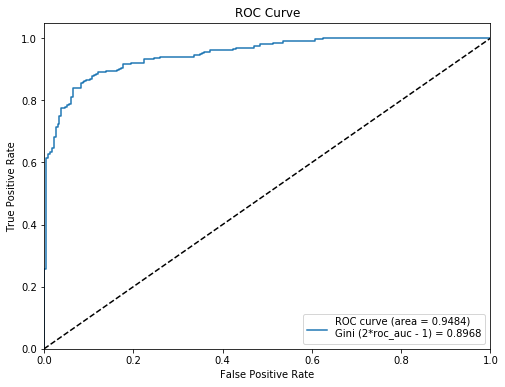

In [185]:
graficar_roc(y_train,pred_proba_train) # 0.9534

In [186]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [187]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     110      23
Real_1      27     103


In [188]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8233333333333334

Accuracy - test: 0.8098859315589354


In [189]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.803     0.827     0.815       133
          1      0.817     0.792     0.805       130

avg / total      0.810     0.810     0.810       263



ROC AUC: 0.8805


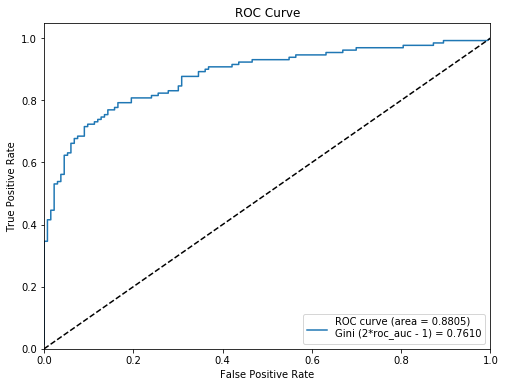

In [190]:
graficar_roc(y_test,pred_proba_test) # 0.8731

## Cross_Validation

In [191]:
import matplotlib.pyplot as plt

In [192]:
X_train_cv = X_train.copy()
y_train_cv = y_train.copy()

In [193]:
# Instanciar Modelo Base:
#from sklearn.ensemble import RandomForestClassifier
#model_rf = RandomForestClassifier(max_depth=5, n_estimators= 50, 
#                                  random_state=100, max_features = 5)

In [203]:
# croos Validation
from sklearn.base import clone
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
k=20 #n_folds
metric = 'roc_auc'

cv = cross_validation.KFold(len(X_train_cv), n_folds=k, random_state = 121, shuffle = True)

results_train = []
results_test = []
list_models = [] 

Ok -  1 :  0.948941 0.858974
Ok -  2 :  0.951336 0.86
Ok -  3 :  0.953197 0.798611
Ok -  4 :  0.948767 0.909091
Ok -  5 :  0.954904 0.730769
Ok -  6 :  0.957262 0.746753
Ok -  7 :  0.950279 0.837037
Ok -  8 :  0.952742 0.777778
Ok -  9 :  0.949753 0.93007
Ok -  10 :  0.948757 0.72028
Ok -  11 :  0.949265 0.874074
Ok -  12 :  0.947053 0.914286
Ok -  13 :  0.954676 0.818182
Ok -  14 :  0.947813 0.976562
Ok -  15 :  0.947034 0.909091
Ok -  16 :  0.949775 0.868056
Ok -  17 :  0.945279 0.983193
Ok -  18 :  0.951034 0.853147
Ok -  19 :  0.950882 0.871429
Ok -  20 :  0.95787 0.792857
max CV roc - train 0.9578696044517973
min CV roc - train 0.9452789498359119
max CV roc - test 0.9831932773109244
min CV roc - test 0.7202797202797202
CV roc - train : 0.9508310241179192
CV roc - test  : 0.8515119868897443


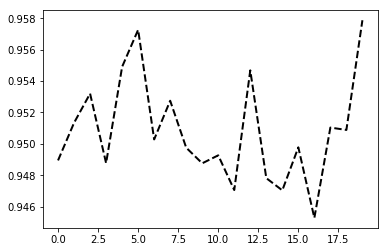

In [204]:
i = 1
for traincv, testcv in cv:
    model = clone(model_regl)
    # Entrenar el modelo
    model = model.fit(X_train_cv.values[traincv], y_train_cv[traincv])
    # Calcular probabilidades
    probas_train = model.predict_proba(X_train_cv.values[traincv])[:,1]
    probas_test = model.predict_proba(X_train_cv.values[testcv])[:,1]
    # Calcular indicadores
    metric_train = roc_auc_score(y_train_cv[traincv],probas_train)
    metric_test = roc_auc_score(y_train_cv[testcv],probas_test)
    # Almacenar metricas y modelos
    results_train.append(metric_train)
    results_test.append(metric_test)
    list_models.append(model)
    
    print("Ok - ",str(i),": ", str(round(metric_train,6)), str(round(metric_test,6)))
    #print("Mean Target: ", str(round(y_train_cv[traincv].mean(),4)), str(round(y_train_cv[testcv].mean(),4)))

    i = i + 1

print("max CV roc - train",np.max(results_train))
print("min CV roc - train",np.min(results_train))
print("max CV roc - test",np.max(results_test))
print("min CV roc - test",np.min(results_test))

plt.plot(range(len(results_train)),results_train, 'k--', linewidth = 2)

result_final_train = np.mean(results_train)
result_final_test = np.mean(results_test)

print("CV roc - train :",result_final_train)
print("CV roc - test  :",result_final_test)

#### Calcular las predicciones sobre el X_test ..

In [205]:
df_probas_subm = pd.DataFrame()
i = 1
for model in list_models:
    probas_tmp = model.predict_proba(X_test)[:,1]
    df_probas_subm["model"+str(i)] = probas_tmp
    i += 1

In [197]:
df_probas_subm.head()

model1    model2    model3    model4    model5    model6    model7  \
0  0.093409  0.120646  0.150299  0.073472  0.103801  0.104432  0.108916   
1  0.919152  0.957503  0.964455  0.966169  0.961364  0.955172  0.963885   
2  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3  0.589335  0.623360  0.707073  0.689901  0.606596  0.648364  0.628164   
4  0.997453  0.998477  0.997421  0.998847  0.997044  0.998748  0.998950   

     model8    model9   model10   model11   model12   model13   model14  \
0  0.085996  0.105223  0.082025  0.112931  0.126031  0.086379  0.110917   
1  0.967628  0.972842  0.974391  0.971559  0.993412  0.964245  0.953781   
2  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3  0.681139  0.613732  0.627032  0.707386  0.638780  0.642600  0.612076   
4  0.999207  0.997997  0.999278  0.998865  0.999581  0.998692  0.998521   

    model15   model16   model17   model18   model19   model20  
0  0.081507  0.074581  0.082107  0.107958  0.128318  0.085456  
1  0.960993  0.978019  0.950758  0.975130  0.963264  0.967205  
2  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
3  0.657129  0.733134  0.674143  0.513302  0.623479  0.622088  
4  0.998663  0.999013  0.998964  0.998847  0.999568  0.998730

In [198]:
y_probas_subm = df_probas_subm.apply(np.mean, axis = 1)
y_probas_subm

0      1.012202e-01
1      9.640464e-01
2      1.000000e+00
3      6.419406e-01
4      9.986433e-01
5      1.806251e-01
6      1.781339e-01
7      2.058300e-01
8      9.991737e-01
9      6.806578e-04
10     1.557364e-02
11     9.942052e-01
12     2.234209e-01
13     9.542209e-01
14     2.124502e-05
15     9.999267e-01
16     1.218848e-01
17     3.809853e-01
18     5.959711e-02
19     9.517413e-01
20     9.999168e-01
21     7.178778e-01
22     1.000000e+00
23     5.842439e-07
24     9.998591e-01
25     2.775368e-01
26     6.544926e-01
27     9.893045e-01
28     4.865030e-01
29     1.776004e-01
           ...     
233    9.998971e-01
234    6.525955e-01
235    2.156769e-01
236    7.391573e-01
237    9.967577e-01
238    3.702075e-02
239    4.780490e-01
240    9.999227e-01
241    2.202433e-01
242    9.987152e-01
243    6.070167e-01
244    4.216002e-01
245    1.383126e-03
246    9.668037e-01
247    5.325206e-02
248    9.731362e-01
249    2.343280e-01
250    4.780136e-01
251    5.445285e-03


In [199]:
roc_auc_score(y_test,y_probas_subm)

0.8833140543666859